In [12]:
from keras.utils import to_categorical
from keras import Sequential, layers, models, preprocessing
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import random

In [13]:
# Load dataset
train_images = np.load("task7_X_train.npy")
train_labels = np.load("task7_y_train.npy")
test_images = np.load("task7_X_test.npy")
test_labels = np.load("task7_y_test.npy")

print("Test images' shape:", test_images.shape)

print("Train images' shape:", train_images.shape)
print("Min:", train_images.min())
print("Max:", train_images.max())

Test images' shape: (498, 224, 224, 3)
Train images' shape: (4138, 224, 224, 3)
Min: -123.68
Max: 151.061


In [14]:
# Normalize pixel values to be between 0 and 1
def normalize(images):
    return (images + 123.68)/274.75

train_images = normalize(train_images)
test_images = normalize(test_images)

print("Train images' shape:", train_images.shape)
print("Min:", train_images.min())
print("Max:", train_images.max())


Train images' shape: (4138, 224, 224, 3)
Min: 0.0
Max: 0.9999672


In [15]:
# Reformat the labels to be 0-3 and categorical instead of [1, 0, 0, 0]-[0, 0, 0, 1]
def re_format(old_labels):
    labels = np.zeros((old_labels.shape[0], 1))
    for i in range(len(old_labels)):
        for j in range(len(old_labels[i])):
            if old_labels[i][j] == 1:
                labels[i] = j
                break
    return labels

train_labels_f = re_format(train_labels)
test_labels_f = re_format(test_labels)

train_labels = to_categorical(train_labels_f, 4)
test_labels = to_categorical(test_labels_f, 4)

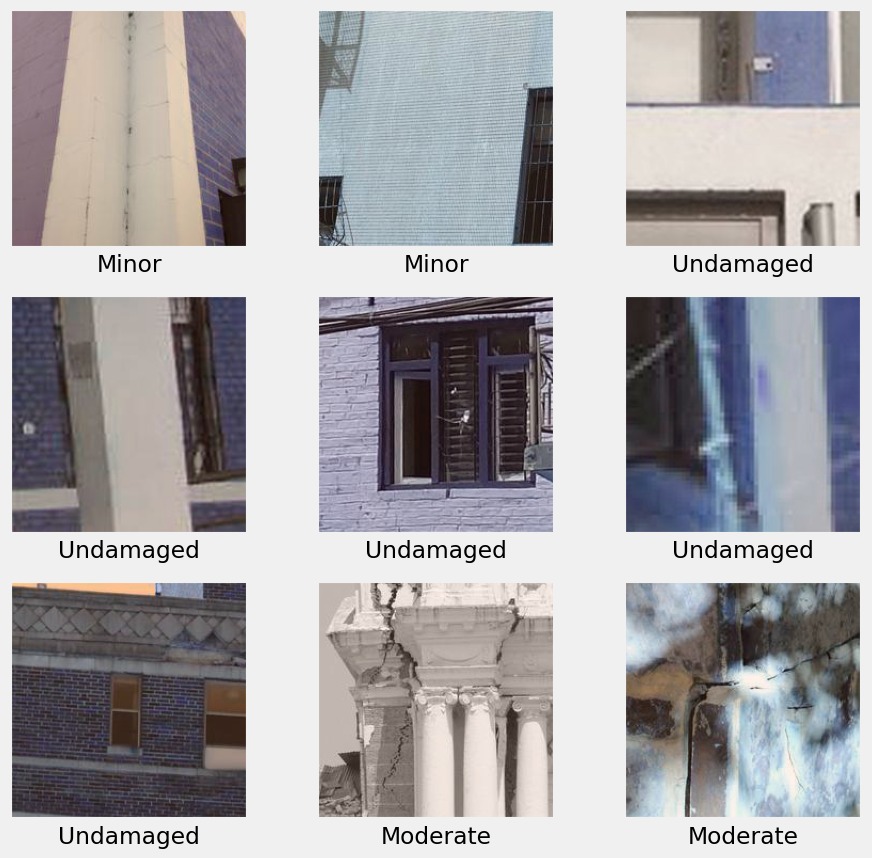

In [16]:
# Validate dataset
label_names = ["Heavy", "Minor", "Moderate", "Undamaged"]

plt.style.use('fivethirtyeight')

plt.figure(figsize=(10,10))

for i in range(9):
    plt.subplot(3,3,i+1)
    rand_int = random.randrange(len(train_images))
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[rand_int])
    # get label index to convert into label name
    label_index = 0
    for j in range(len(train_labels[rand_int])):
        if train_labels[rand_int][j] == 1:
            label_index = j
            break
    plt.xlabel(label_names[label_index])

plt.show()

In [17]:
# Setup Training Plot
def plot(acc,val_acc,loss,val_loss,epochs):
    epochs_range = range(0, epochs)

    plt.figure(figsize=(20,10))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')

    splt = plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.show()

In [18]:
# Setup model
model = models.Sequential()

model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=train_images.shape[1:]))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(rate=0.2))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 111, 111, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 54, 54, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 26, 26, 64)       

In [19]:
# Overfitted Run
# epochs = 10

# model.compile(optimizer='adam',
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

# history = model.fit(train_images, train_labels, epochs=epochs, 
#                     validation_data=(test_images, test_labels))

In [20]:
# Analyze Run
# acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']

# loss = history.history['loss']
# val_loss = history.history['val_loss']

# plot(acc,val_acc,loss,val_loss,epochs)

In [21]:
# Data Augmentation
aug = preprocessing.image.ImageDataGenerator(
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=30,
    zoom_range=0.5,
    fill_mode='nearest'
)

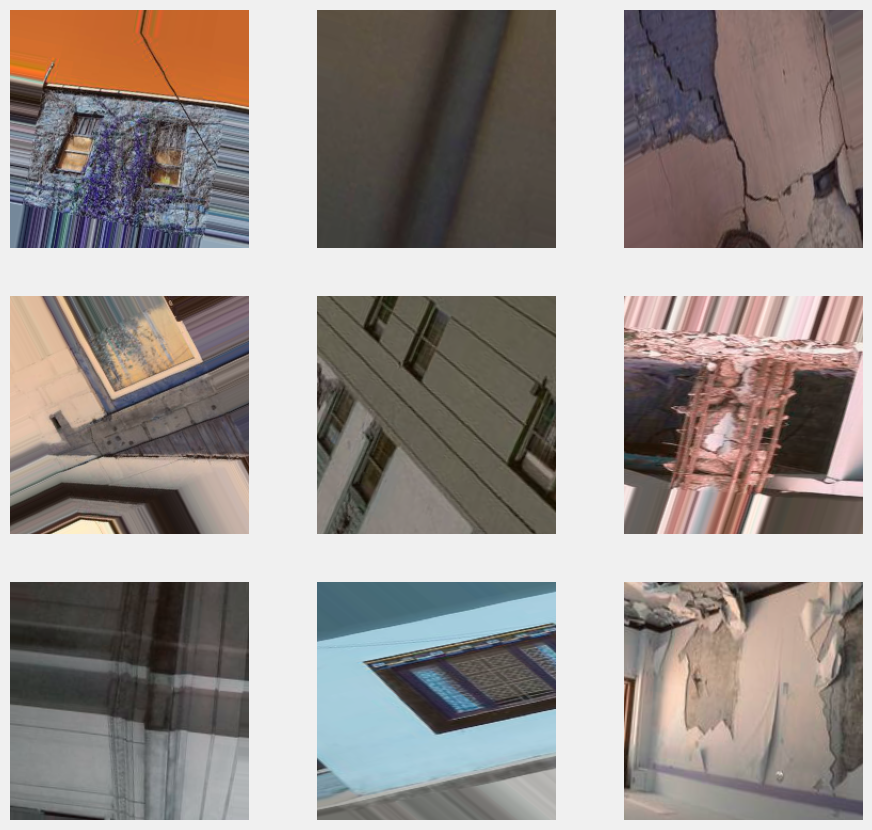

In [22]:
# Plot Augmentation
augmented_images = aug.flow(train_images)
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(next(augmented_images)[i])
    plt.axis("off")

In [32]:
# Improved Run
epochs = 100 # for testing final should probably be 15+

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(aug.flow(train_images, train_labels), epochs=epochs, 
                    validation_data=(test_images, test_labels))

Epoch 1/20
130/130 [==============================] - 46s 351ms/step - loss: 0.8662 - accuracy: 0.6527 - val_loss: 0.9386 - val_accuracy: 0.6205
Epoch 2/20
130/130 [==============================] - 47s 363ms/step - loss: 0.8461 - accuracy: 0.6515 - val_loss: 0.9770 - val_accuracy: 0.6064
Epoch 3/20
130/130 [==============================] - 49s 372ms/step - loss: 0.8501 - accuracy: 0.6549 - val_loss: 0.9321 - val_accuracy: 0.6124
Epoch 4/20
130/130 [==============================] - 47s 363ms/step - loss: 0.8492 - accuracy: 0.6559 - val_loss: 1.1609 - val_accuracy: 0.5703
Epoch 5/20
130/130 [==============================] - 43s 329ms/step - loss: 0.8547 - accuracy: 0.6510 - val_loss: 0.9632 - val_accuracy: 0.6145
Epoch 6/20
130/130 [==============================] - 43s 329ms/step - loss: 0.8409 - accuracy: 0.6554 - val_loss: 0.9169 - val_accuracy: 0.6386
Epoch 7/20
130/130 [==============================] - 43s 328ms/step - loss: 0.8283 - accuracy: 0.6573 - val_loss: 0.9302 - val_ac

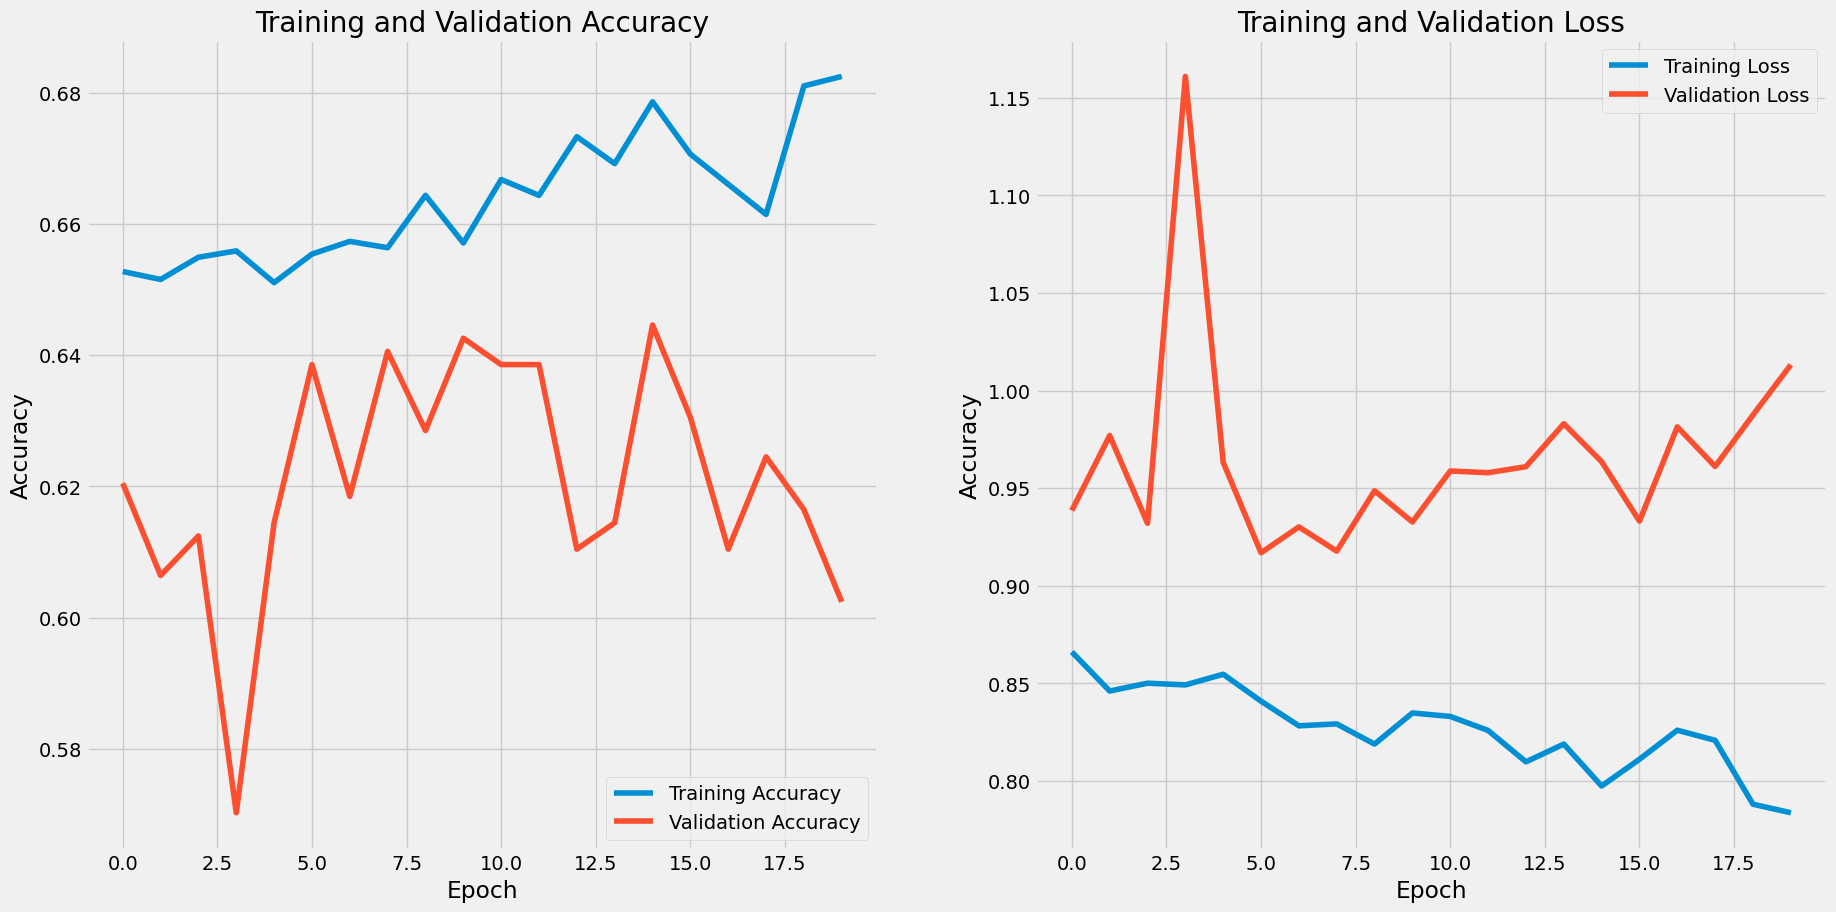

In [33]:
# Analyze Improved Run
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']


plot(acc,val_acc,loss,val_loss,epochs)

1/1 [==============================] - 0s 17ms/step
Prediction: Undamaged state with a 46.64 confidence.
Actual: Undamaged state ✓.


(-0.5, 223.5, 223.5, -0.5)

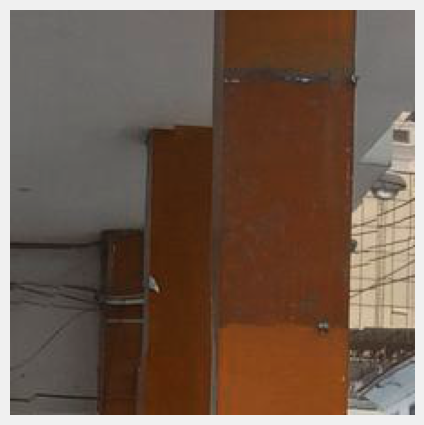

In [30]:
# Predict on new images
rand_int = random.randrange(len(test_images))
predictions = model.predict(test_images[rand_int:rand_int+1])
score = tf.nn.softmax(predictions[0])

class_names = ["Heavy damage", "Minor damage", "Moderate damage", "Undamaged state"]

print("Prediction: {} with a {:.2f} confidence."
      .format(class_names[np.argmax(score)], 100 * np.max(score)))

label_index = 0
for j in range(len(test_labels[rand_int])):
    if test_labels[rand_int][j] == 1:
        label_index = j
        break
print("Actual: {}".format(class_names[label_index]), end=" ")
if label_index == np.argmax(score):
    print("✓.")
else:
    print("X.")

# Plot Augmentation
plt.figure(figsize=(5, 5))
plt.imshow(test_images[rand_int])
plt.axis("off")

In [31]:
# Convert the model
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model
with open('model2.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\seanp\AppData\Local\Temp\tmpxbygfnd3\assets


INFO:tensorflow:Assets written to: C:\Users\seanp\AppData\Local\Temp\tmpxbygfnd3\assets
